<a href="https://colab.research.google.com/github/aaabduali/Facial-Emotion/blob/main/VGG16_No_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d 'msambare/fer2013'

 91% 55.0M/60.3M [00:00<00:00, 60.7MB/s]
100% 60.3M/60.3M [00:00<00:00, 88.5MB/s]


In [4]:
import os
import zipfile

local_zip = '/content/fer2013.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir='/tmp/'

train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

surprise_train_dir=os.path.join(train_dir,'surprise')
fear_train_dir=os.path.join(train_dir,'fear')
angry_train_dir=os.path.join(train_dir,'angry')
neutral_train_dir=os.path.join(train_dir,'neutral')
sad_train_dir=os.path.join(train_dir,'sad')
disgust_train_dir=os.path.join(train_dir,'disgust')
happy_train_dir=os.path.join(train_dir,'happy')

surprise_test_dir=os.path.join(test_dir,'surprise')
fear_test_dir=os.path.join(test_dir,'fear')
angry_test_dir=os.path.join(test_dir,'angry')
neutral_test_dir=os.path.join(test_dir,'neutral')
sad_test_dir=os.path.join(test_dir,'sad')
disgust_test_dir=os.path.join(test_dir,'disgust')
happy_test_dir=os.path.join(test_dir,'happy')

In [6]:
train_happy_names = os.listdir(happy_train_dir)
print(train_happy_names[:10])

['Training_80039330.jpg', 'Training_28637944.jpg', 'Training_30138698.jpg', 'Training_26249029.jpg', 'Training_72995268.jpg', 'Training_80567356.jpg', 'Training_47178464.jpg', 'Training_44820215.jpg', 'Training_37894339.jpg', 'Training_72133442.jpg']


In [7]:
print("Total images in the training data with surprise label are: ",len(os.listdir(surprise_train_dir)))
print("Total images in the training data with fear label are: ",len(os.listdir(fear_train_dir)))
print("Total images in the training data with angry label are: ",len(os.listdir(angry_train_dir)))
print("Total images in the training data with neutral label are: ",len(os.listdir(neutral_train_dir)))
print("Total images in the training data with sad label are: ",len(os.listdir(sad_train_dir)))
print("Total images in the training data with disgust label are: ",len(os.listdir(disgust_train_dir)))
print("Total images in the training data with happy label are: ",len(os.listdir(happy_train_dir)))


Total images in the training data with surprise label are:  3171
Total images in the training data with fear label are:  4097
Total images in the training data with angry label are:  3995
Total images in the training data with neutral label are:  4965
Total images in the training data with sad label are:  4830
Total images in the training data with disgust label are:  436
Total images in the training data with happy label are:  7215


In [8]:
print("Total images in the test data with surprise label are: ",len(os.listdir(surprise_test_dir)))
print("Total images in the test data with fear label are: ",len(os.listdir(fear_test_dir)))
print("Total images in the test data with angry label are: ",len(os.listdir(angry_test_dir)))
print("Total images in the test data with neutral label are: ",len(os.listdir(neutral_test_dir)))
print("Total images in the test data with sad label are: ",len(os.listdir(sad_test_dir)))
print("Total images in the test data with disgust label are: ",len(os.listdir(disgust_test_dir)))
print("Total images in the test data with happy label are: ",len(os.listdir(happy_test_dir)))

Total images in the test data with surprise label are:  831
Total images in the test data with fear label are:  1024
Total images in the test data with angry label are:  958
Total images in the test data with neutral label are:  1233
Total images in the test data with sad label are:  1247
Total images in the test data with disgust label are:  111
Total images in the test data with happy label are:  1774


In [9]:
import tensorflow as tf

In [10]:
!pip install keras_vggface

In [11]:
!pip install keras_applications

     |████████████████████████████████| 51kB 3.8MB/s 


In [12]:
from keras_vggface.vggface import VGGFace

In [13]:
vgg_cnn=VGGFace(weights='vggface',include_top=False,input_shape=(224,224,3))

58925056/58909280 [==============================] - 1s 0us/step


In [14]:
for layer in vgg_cnn.layers:
  layer.trainable=False

In [15]:
model=tf.keras.models.Sequential()


model.add(vgg_cnn)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(7,activation='softmax'))

In [16]:
model.summary()

ValueError: ignored

In [17]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.
      #,width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #vertical_flip=True,
      #fill_mode='nearest'
      )
test_datagen=ImageDataGenerator(rescale=1/255.)

In [18]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 
                                                 target_size=(224,224))
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=5,
                                                
                                                 class_mode='categorical',
                                                 target_size=(224,224))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                  validation_data=test_generator,
                  validation_steps=test_generator.samples/test_generator.batch_size,
                  epochs=50,
                  verbose=1
                  )

Epoch 1/50
897/897 [==============================] - 179s 192ms/step - loss: 1.3525 - accuracy: 0.4890 - val_loss: 1.0975 - val_accuracy: 0.5928
Epoch 2/50
897/897 [==============================] - 169s 188ms/step - loss: 1.1350 - accuracy: 0.5763 - val_loss: 1.0742 - val_accuracy: 0.5954
Epoch 3/50
897/897 [==============================] - 169s 188ms/step - loss: 1.0343 - accuracy: 0.6129 - val_loss: 1.0215 - val_accuracy: 0.6141
Epoch 4/50
897/897 [==============================] - 168s 188ms/step - loss: 0.9544 - accuracy: 0.6396 - val_loss: 1.0136 - val_accuracy: 0.6243
Epoch 5/50
897/897 [==============================] - 168s 188ms/step - loss: 0.8928 - accuracy: 0.6617 - val_loss: 1.0055 - val_accuracy: 0.6335
Epoch 6/50
897/897 [==============================] - 168s 188ms/step - loss: 0.8407 - accuracy: 0.6805 - val_loss: 1.0240 - val_accuracy: 0.6239
Epoch 7/50
897/897 [==============================] - 169s 188ms/step - loss: 0.7812 - accuracy: 0.6980 - val_loss: 1.0345 -

NameError: ignored

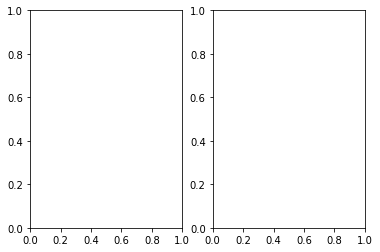

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()